In [1]:
import scipy as sp
from pandas.core import datetools 
import numpy as np
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [12]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

from sklearn.datasets import fetch_lfw_people
lfw1 = fetch_lfw_people(min_faces_per_person=10)
lfw2 = fetch_lfw_people(funneled=False) ## funnelling은 이미지 위치조정 ## 올리비티 얼굴 이미지 다운로드 


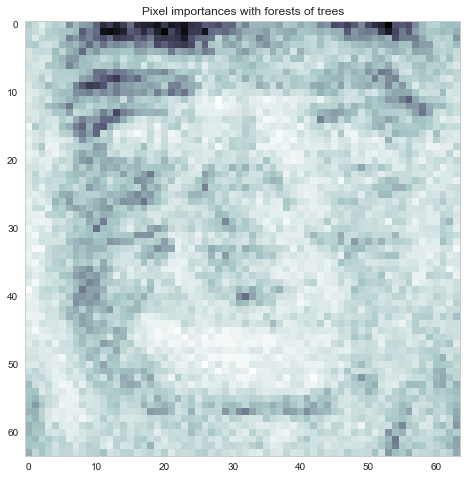

In [3]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

data = fetch_olivetti_faces()
X = data.data
y = data.target

forest = ExtraTreesClassifier(n_estimators=1000, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("Pixel importances with forests of trees")
plt.show()
## feature importance 큰부분을 진하게 해서 본것임, 이미지중 어디를 중요하게 보는지를 나타냄 - 평가기준이 됨 

In [4]:
## 실습

from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=0) ## 셔플로 섞어줘야함 아니면 1번부터 순서대로 샘플 뽑아줌 
for train_index, test_index in cv.split(X):
    print("test index :", test_index)
    print("." * 80 )        
    print("train index:", train_index)
    print("=" * 80 )

test index : [  1   4   5   6   7  10  12  14  15  20  26  37  45  52  54  59  60  65
  68  74  76  78  90 100 102 107 113 124 132 134 140 141 144 145 154 155
 158 170 171 173 175 176 179 191 196 199 206 214 225 233 246 247 255 260
 261 268 272 280 286 293 294 297 303 304 309 310 313 318 322 329 334 341
 344 348 354 361 363 371 374 399]
................................................................................
train index: [  0   2   3   8   9  11  13  16  17  18  19  21  22  23  24  25  27  28
  29  30  31  32  33  34  35  36  38  39  40  41  42  43  44  46  47  48
  49  50  51  53  55  56  57  58  61  62  63  64  66  67  69  70  71  72
  73  75  77  79  80  81  82  83  84  85  86  87  88  89  91  92  93  94
  95  96  97  98  99 101 103 104 105 106 108 109 110 111 112 114 115 116
 117 118 119 120 121 122 123 125 126 127 128 129 130 131 133 135 136 137
 138 139 142 143 146 147 148 149 150 151 152 153 156 157 159 160 161 162
 163 164 165 166 167 168 169 172 174 177 178 180 181 182

In [5]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest, X, y, scoring="accuracy", cv=5) ## 셋1,2,3,4,5 에 대한 성능값 

array([ 1.    ,  0.9375,  0.95  ,  0.9625,  0.925 ])

In [10]:
from sklearn.tree import DecisionTreeClassifier

face = DecisionTreeClassifier(criterion='entropy', max_depth=10).fit(X, y)

cv = KFold(n_splits=5, shuffle=True, random_state=0) ## 셔플로 섞어줘야함 아니면 1번부터 순서대로 샘플 뽑아줌 
for train_index, test_index in cv.split(X):
    print("test index :", test_index)
    print("." * 80 )        
    print("train index:", train_index)
    print("=" * 80 )

test index : [  1   4   5   6   7  10  12  14  15  20  26  37  45  52  54  59  60  65
  68  74  76  78  90 100 102 107 113 124 132 134 140 141 144 145 154 155
 158 170 171 173 175 176 179 191 196 199 206 214 225 233 246 247 255 260
 261 268 272 280 286 293 294 297 303 304 309 310 313 318 322 329 334 341
 344 348 354 361 363 371 374 399]
................................................................................
train index: [  0   2   3   8   9  11  13  16  17  18  19  21  22  23  24  25  27  28
  29  30  31  32  33  34  35  36  38  39  40  41  42  43  44  46  47  48
  49  50  51  53  55  56  57  58  61  62  63  64  66  67  69  70  71  72
  73  75  77  79  80  81  82  83  84  85  86  87  88  89  91  92  93  94
  95  96  97  98  99 101 103 104 105 106 108 109 110 111 112 114 115 116
 117 118 119 120 121 122 123 125 126 127 128 129 130 131 133 135 136 137
 138 139 142 143 146 147 148 149 150 151 152 153 156 157 159 160 161 162
 163 164 165 166 167 168 169 172 174 177 178 180 181 182

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(face, X, y, scoring="accuracy", cv=5) ## 셋1,2,3,4,5 에 대한 성능값 

array([ 0.525 ,  0.525 ,  0.5375,  0.5625,  0.5   ])